# Final Project 
- **Statistical Analysis of the Mobile Phone Price by Features, Specifications, and Performance**

Gayeon Kim, Yujin Son, Jiwon Kim

## 1. Introduction

For modern people, mobile phone is one of the most essential items. People use their mobile phones not only to call and text others, but also to search for the information in need, to write down documents, and even to make media contents. Although the aspects that they think the most important might vary, most people would want to use the latest high-performance mobile phones. However, recently released mobile phones are more expensive than before as their performance improve.

Our group is going to analyze which features of mobile phones have a significant effect on mobile phone pricing. Given that mobile phone is a necessary item but also high in price, it is clear that people would be interested in this topic and further analyses. For descriptive analytics section, we will explore how phone price alternates by the changes in processor frequency or a size of a ram. Then, we conduct inference research concerned with operation system brand and phone price. Next section presents the linear regression research for phone price and various features determinative to performance of a phone. The last section explores the logistic regression with a parsimonious model for identifying expected ratings responding to selected predictor variables.

The answers to these research questions could be helpful for both manufacturers and consumers. In the perspective of consumers,  they can consider how the features they are interested in would affect the price of a mobile phone. Consumers consider performance important when it comes to purchasing mobile phones, but they cannot avoid weighing prices in consideration of their budgets.The results of these analyses will help them make a reasonable compromise on some performance-decisive features in their mobile phone purchase decisions. <br>
From the perspective of manufacturers, by examining whether there is a linear relationship between these technical specifications and the price, we can provide insights into whether consumers are paying more or giving higher ratings for better performance or if there are other factors at play. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

In [2]:
# read the preprocessed data
phone = pd.read_csv('df.csv')

# Our data has 695 rows and 18 columns.
print(phone.shape)

# Display of first 6 observations from our dataframe. 
phone.head(6)

(695, 18)


,price,rating,specs_score,sim,5G,NFC,core,frequency,ram_inbuilt,ram,battery,display_size,display_pixels,display_frequency,front_camera,rear_camera,memory_card,os_brand
0,37999,4.50,84,2,True,False,8,3.10,128,8,4600,6.78,2592000,120.0,50.0,3,False,1
1,39999,4.45,85,2,True,True,8,3.20,128,8,5000,6.74,3437280,120.0,16.0,3,False,1
2,18999,4.00,81,2,True,False,8,2.20,128,6,5000,6.59,2604960,120.0,16.0,3,True,1
3,29999,4.40,86,2,True,True,8,2.20,128,8,4800,6.70,2604960,120.0,32.0,3,True,1
4,65999,4.65,81,2,True,True,6,3.22,128,6,3279,6.10,2962440,0.0,12.0,2,False,0
5,29999,3.95,85,2,True,True,8,2.50,128,8,4500,6.55,2592000,120.0,16.0,2,False,1


Our data 'phone.csv' contains the data about each phone, such as price, rating, and specification scores. It also has information about the physical features of each phone, such as display size, and performance such as battery, storage capacity, the frequency for the processor, and whether the phone support 5G, NFC, and memory card. The limitation of our raw data (https://www.kaggle.com/datasets/ashpalsingh1525/mobilephones-dataset) was that we cannot know how some variables were defined. For example, we cannot know the size of respondents and the measurement of methods for column 'rating'. Also, we converted some variables of our raw data containing unit expressions (read as 'objects') into numeric type values while data cleaning. We unified the data unit into GB for variables related to size of memories. Other than that, for some categorical variables that include so many levels, we dropped off the levels that only had few rows. 

## 2. Descriptive Analytics

**RQ 1** : What is the relationship between a **price** and a **processor frequency** of a phone?

In [3]:
# summary statistics for each variables; 'frequency' and 'price'
phone[['frequency', 'price']].describe()

,frequency,price
count,695.000000,695.000000
mean,2.508058,32517.775540
std,0.457799,30898.501175
min,1.600000,5340.000000
25%,2.200000,13999.000000
50%,2.400000,19999.000000
75%,3.000000,36994.500000
max,3.460000,197999.000000


In [4]:
# calculate a correlation between variable 'frequency' and 'price'
print(phone['frequency'].corr(phone['price']))

0.7233443545126061


<AxesSubplot:xlabel='frequency', ylabel='price'>

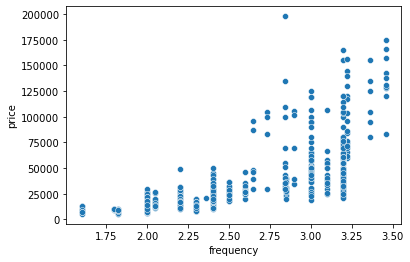

In [5]:
sns.scatterplot(data = phone, x = "frequency", y = "price")

The relationship between frequency and price is positive, non-linear, moderate in strength, and has one outlier in right above. Correlation value between two variables is 0.72, which also supports the relationship that we described with a scatterplot. 

Now, we would like to navigate through the relationship between a **price** and **processor frequency** by whether an extra **memory card** is supported or not.  

<AxesSubplot:xlabel='frequency', ylabel='price'>

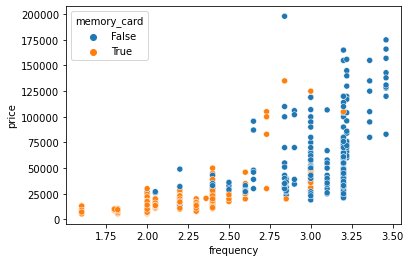

In [6]:
sns.scatterplot(data = phone, x = "frequency", y = "price", hue = "memory_card")

Whether an extra memory card is supported or not seems to affect the relationship between processor frequency and price. For those unavailable for extra memory cards are more likely to show positive relationship between frequency and price. Phones that are available of extra memory cards tend to have low frequency as well as low price, and do not show noticeable relationship between two variables according to the scatterplot above.

**RQ 2** : Is there a relationship between a phone's **price** and **size of a ram**?

<AxesSubplot:xlabel='ram', ylabel='price'>

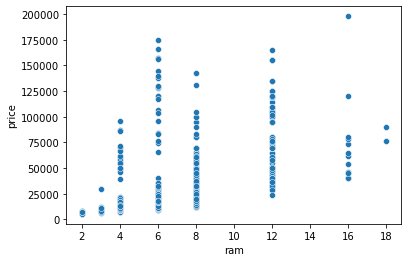

In [7]:
sns.scatterplot(data = phone, x = "ram", y = "price")

In [8]:
print(phone['ram'].corr(phone['price']))

0.525221617625035


The relationship between a size of ram and price is positive, non-linear (having too large variance), and weak in strength. Because there merely is a relationship between two variables, it is hard to say which data is an outlier. 

Correlation value also shows that it is hard to say that there is a relationship between those two variables. 

## 3. Inference

We would like to conduct hypothesis testing for identifying the association between os brand and the price of all mobile phone. So, our research question is that **whether the population mean price of iOS is greater than the population mean price of Android**.<br>

These are our **hypotheses**. <br>
$H_0: \mu_i - \mu_A = 0$<br>
$H_a: \mu_i - \mu_A > 0$<br>
where $\mu_i$ is the population mean price of iOS mobile phone and $\mu_A$ is the population mean price of Android mobile phone.<br>

In [9]:
# iOS brand is mapped as 0, Android brand is mapped as 1

os_i = phone[phone['os_brand']== 0]
os_A = phone[phone['os_brand']== 1]

n_i = len(os_i)
n_A = len(os_A)

mean_i = os_i['price'].mean()
mean_A = os_A['price'].mean()

std_i = os_i['price'].std()
std_A = os_A['price'].std()

print('sample size of iOS: ', n_i)
print('sample size of Android: ', n_A)

print('\nsample mean price of iOS: ', mean_i)
print('sample mean price of Android: ', mean_A)

print('\nsample standard deviation of iOS: ', std_i)
print('sample standard deviation Android: ', std_A)

sample size of iOS:  40
sample size of Android:  655

sample mean price of iOS:  95348.45
sample mean price of Android:  28680.78778625954

sample standard deviation of iOS:  39663.917506294725
sample standard deviation Android:  25750.718144835773


Next, let's heck the Central Limit Theorem conditions for differences of sample means to see if we can make valid interpretations and inferences with our hypothesis testing.<br>
1. Sample with *iOS* mobile phone is randomly sampled.
2. $n_i = 40 < 10\%$ of all *iOS* mobile phone.
3. Sample with *Android* mobile phone is randomly sampled.
4. $n_A = 655 < 10\%$ of all *Android* mobile phone.
5. $n_i = 40 > 30$
6. $n_A = 655 > 30$
7. We can assume that there is no pairwise relationship between the mobilephone in both groups in this sample.
All of the conditions are met, so we can proceed with conducting this hypothesis test.

We do not know $\sigma_i$ and $\sigma_A$, so we will calculate the t-score of our point estimate $(\bar{x}_i - \bar{x}_A)$ and use the t-distribution $df=min\{n_i-1, n_A-1\} = min\{40-1, 655-1\} = 39$ to calculate our p-value probability.

In [10]:
point_est = mean_i - mean_A
print('point estimate: ', point_est)

std_err = np.sqrt((std_i**2)/n_i + (std_A**2)/n_A)
print('\nstandard error for point estimate: ', std_err)

test_stat = (point_est - 0) / std_err
print('\ntest statistic (t-score of the point estimate): ', test_stat)

pval = 1-t.cdf(np.abs(test_stat), df=39)
print('p-value: ', pval)

point estimate:  66667.66221374046

standard error for point estimate:  6351.615890824122

test statistic (t-score of the point estimate):  10.496173471392071
p-value:  3.1896707497480747e-13


We will set the significance level 0.05. 
Because $p-value \approx 0 < \alpha = 0.05$, we reject the null hypothesis. Thus we do have sufficient evidence to suggest that $H_a: \mu_i - \mu_A > 0$ (i.e., the population mean price of *iOS* is greater than the population mean price of *Android*.)

## 4. Linear Regression

Our research question is **Is there a linear relationship between price and ram, core, number of sim and whether the phone can put on extra memory card or not?**.

In [11]:
mod1 = smf.ols('price ~ ram+memory_card+core+sim', data=phone).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 03 May 2023   Prob (F-statistic):          3.68e-107
Time:                        00:44:06   Log-Likelihood:                -7918.8
No. Observations:                 695   AIC:                         1.585e+04
Df Residuals:                     690   BIC:                         1.587e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9.719e+04   3.11e+04      3.127      0.002    3.62e+04    1.58e+05
memory_card[T.True] -1.988e+04   2016.012     -9.862      0.000   -2.38e+04   -1.59e+04
ram                  4967.3870    357.179     13.907      0.000    4266.099    5668.675
core                -1.592e+04   1325.185    -12.011      0.000   -1.85e+04   -1.33e+04
sim                  1.892e+04   1.55e+04      1.222      0.222   -1.15e+04    4.93e+04
==============================================================================
Omnibus:                      241.287   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1169.258
Skew:                           1.503   Prob(JB):                    1.26e-254
Kurtosis:                       8.598   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Linear Regression Equation**<br>
$\hat{y} = 97190 - 19880(memory\_card) + 4967(ram) - 15920(core) + 18920(sim)$

**Condition 1: Linearity Condition**<br>
Because the distribution of points in the plot below are roughly evenly distributed above and below the line as we move from left to right, we can say the linearity condition is NOT met.

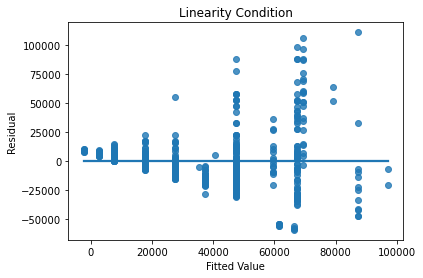

In [12]:
sns.regplot(x=mod1.fittedvalues, y=mod1.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.title('Linearity Condition')
plt.show()

**Condition 2: Constant Variability of Residuals Condition**<br>
Because the y‑axis spread of points in the plot below slightly change as we move from left to right, we can say that this condition is slightly NOT met.

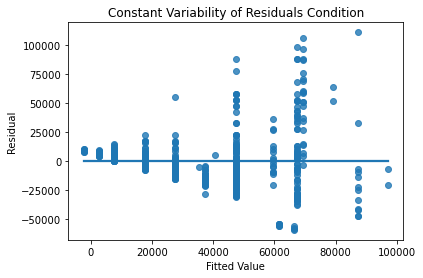

In [13]:
sns.regplot(x=mod1.fittedvalues, y=mod1.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.title('Constant Variability of Residuals Condition')
plt.show()

We tried to transform one of the variables *ram* with a natural log and checked the condition again, but the constant variability of residual condition is still violated.

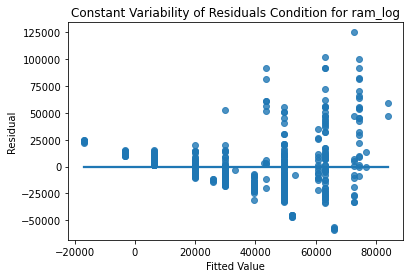

In [14]:
df = phone.copy()
df['ram_log'] = np.log(df['ram'])

mod11 = smf.ols('price ~ ram_log+memory_card+core+sim', data=df).fit()

sns.regplot(x=mod11.fittedvalues, y=mod11.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.title('Constant Variability of Residuals Condition for ram_log')
plt.show()

**Condition 3: Normality of Residuals (with Mean of 0) Condition**<br>
Because the histogram of residuals is slightly skewed to the right, the assumption that the residuals are normally distributed is slightly not met. However, it does not look like the mean is about 0).

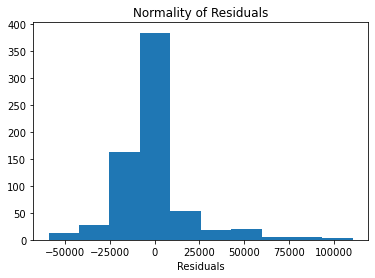

In [15]:
plt.hist(mod1.resid)
plt.xlabel('Residuals')
plt.title('Normality of Residuals')
plt.show()

**Condition 4 Independence of Residuals Condition**<br>
As we mentioned above, we verify that:<br>
- the data is randomly sampled and<br>
- the sample size n=695<10% of ALL mobile phone<br>
Thus the condition for independence of residuals may not be violated in this particular way. <br>
However, it may still be the case that these residuals are not independent.

**Condition 5: No Multicolinearity Condition**<br>
Even though there is a pretty moderate linear relationship $(R=-0.49)$ between the explanatory variables *ram* and *memory_card*, we can say that the multicollinearity condition is met.

In [16]:
features = ['ram', 'memory_card', 'core', 'sim']
phone[features].corr()

,ram,memory_card,core,sim
ram,1.000000,-0.490080,0.247658,0.063610
memory_card,-0.490080,1.000000,0.133721,0.065993
core,0.247658,0.133721,1.000000,0.145616
sim,0.063610,0.065993,0.145616,1.000000


The percent of variablity in our response variable *price* is explained by this model in the dataset is **0.5159**. It is not that high percentage, but not that low. We guess our model could moderately explain the percent of variability in our response variable.

In [17]:
print('R-squared the model: ', mod1.rsquared)

R-squared the model:  0.5158668465850271


According to our model, we predicted the price of a 8GB ram, 8GB core, 2 of sim that can put on extra memory card. As a result, predicted price is 27,547 Indian Rupee which is about 337 USD.

In [18]:
mod1.predict(exog=dict(ram=8, memory_card=True, core=8, sim=2))

0    27547.67832
dtype: float64

In [19]:
print('p-value for memory_card: ', 2*(1-t.cdf(np.abs((19880-0)/2016.012), df=df.shape[0]-1)))
print('p-value for ram: ', 2*(1-t.cdf(np.abs((4967-0)/357.179), df=df.shape[0]-1)))
print('p-value for core: ', 2*(1-t.cdf(np.abs((15920-0)/1325.185), df=df.shape[0]-1)))
print('p-value for sim: ', 2*(1-t.cdf(np.abs((18920-0)/15500), df=df.shape[0]-1)))  

p-value for memory_card:  0.0
p-value for ram:  0.0
p-value for core:  0.0
p-value for sim:  0.2226349644538319


Except the slope for *sim*, p-value for other slopes are small enough to reject the null hypothesis. Thus we have sufficient evidence to suggest that the **memory_card, ram, and core slope** in the multiple linear regression population model (that predicts the price of all mobile phone with memory_card, ram, core, and sim) is non-zero. However, the p-value for **sim slope** is 0.2, which is too big to reject the null hypothesis, so we cannot reject the null hypothesis(the sim slope is zero). Thus we do not have sufficient evidence to suggest that the sim slope in the MLR population model is non-zero.

As we mentioned, our research question is **is there a linear relationship between price and ram, core, the number of sim and whether the phone can put on extra memory card or not**. We thought that our model is pretty not good to estimate the price. First, the R-Squared is 0.516 (0.513 for adjusted R-Squared) which is pretty low to have a significance. In addition, our linear regression model could not meet most conditions except Independence of Residuals Condition and No Multicolinearity Condition. But there is still possibility that the dependence of residuals due to the knowledge that we did not learn. Then, when we found the evidence to suggest which slope is non-zero in the population model, we did not have sufficient evidence to suggest that *sim* slope in the MLR population model is non-zero. 
Thus, our model is not appropriate to explain the predicted price for the mobile phone in the relationship with 4 explanatory variables we chose; ram, core, sim, and memory_card. 

## 5. Logistic Regression

Our final research question is, "Is there a linear relationshop between the log-odds of the level of *rating* and *specs score*, *core*, *battery*, and *os brand* in the sample?". Furthermore, we research what explanatory variables should we include in the model to build a parsimonious model. <br>
In our dataset, 'rating' is a numerical variable, so we created a 0/1 categorical variable. Since the median value of recorded ratings is 4.35, ratings that are 4.35 or more are mapped to 1 (=highly rated) while the others are mapped to 0. 

In [20]:
phone['rating'].describe()

count    695.000000
mean       4.356763
std        0.234069
min        3.750000
25%        4.150000
50%        4.350000
75%        4.550000
max        4.750000
Name: rating, dtype: float64

In [21]:
phone['high_rating'] = 1 * (phone['rating'] >= 4.35)

Reminder of our **RQ** : "Is there a linear relationship between the log-odds of the level of rating and specs score, core, battery, and os brand in our sample?"

In [22]:
phone_train, phone_test = train_test_split(phone,test_size=0.25, random_state=428)

print(phone_train.shape[0]/phone.shape[0], phone_test.shape[0]/phone.shape[0])

0.7496402877697842 0.2503597122302158


In [23]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              695 non-null    int64  
 1   rating             695 non-null    float64
 2   specs_score        695 non-null    int64  
 3   sim                695 non-null    int64  
 4   5G                 695 non-null    bool   
 5   NFC                695 non-null    bool   
 6   core               695 non-null    int64  
 7   frequency          695 non-null    float64
 8   ram_inbuilt        695 non-null    int64  
 9   ram                695 non-null    int64  
 10  battery            695 non-null    int64  
 11  display_size       695 non-null    float64
 12  display_pixels     695 non-null    int64  
 13  display_frequency  695 non-null    float64
 14  front_camera       695 non-null    float64
 15  rear_camera        695 non-null    int64  
 16  memory_card        695 non

In [24]:
current_mod=smf.logit('high_rating~ specs_score + core + battery + os_brand', data=phone_train).fit()
display(current_mod.summary())
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.686327
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            high_rating   No. Observations:                  521
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 May 2023   Pseudo R-squ.:                0.008889
Time:                        00:48:36   Log-Likelihood:                -357.58
converged:                       True   LL-Null:                       -360.78
Covariance Type:            nonrobust   LLR p-value:                    0.1703
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.5900      1.300     -0.454      0.650      -3.138       1.958
specs_score     0.0190      0.011      1.656      0.098      -0.003       0.042
core           -0.2499      0.187     -1.333      0.183      -0.617       0.118
battery         0.0001      0.000      1.265      0.206   -7.04e-05       0.000
os_brand        0.5056      0.553      0.914      0.361      -0.579       1.590
===============================================================================
"""

ITERATION 1: BIC of the Current Model 746.4311653893122


#### Iteration 1 of Backwards Elimination

In [25]:
test_mod = smf.logit('high_rating~ core + battery + os_brand', data=phone_train).fit()
print('BIC of Test Model that Deletes specs_score from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.688978
         Iterations 5
BIC of Test Model that Deletes specs_score from the Current Model 742.9385244672534


In [26]:
test_mod = smf.logit('high_rating~ specs_score + battery + os_brand', data=phone_train).fit()
print('BIC of Test Model that Deletes core from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.688139
         Iterations 5
BIC of Test Model that Deletes core from the Current Model 742.0636227913823


In [27]:
test_mod = smf.logit('high_rating~ specs_score + core + os_brand', data=phone_train).fit()
print('BIC of Test Model that Deletes battery from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.688386
         Iterations 4
BIC of Test Model that Deletes battery from the Current Model 742.3209563606689


In [28]:
test_mod = smf.logit('high_rating~ specs_score + core + battery', data=phone_train).fit()
print('BIC of Test Model that Deletes os_brand from the Current Model',test_mod.bic)

Optimization terminated successfully.
         Current function value: 0.687134
         Iterations 6
BIC of Test Model that Deletes os_brand from the Current Model 741.0162198871618


Because there was at least one "test model" that has a BIC score that is lower than the BIC score of the current model, we continue on to step 4 in the algorithm.<br>
The "test model" that had the lowest BIC score was the one that deleted the "os_brand" explanatory variable from the "current model". So we set the new "current model" to be the test model that does not include "os_brand" and we go back to step (2). We can call this a new iteration of the algorithm.

#### Iteration 2 of Backwards Elimination

In [29]:
current_mod=smf.logit('high_rating~ specs_score + battery + core', data=phone_train).fit()
print('ITERATION 2: BIC of the Current Model',current_mod.bic)
cmbic = current_mod.bic

Optimization terminated successfully.
         Current function value: 0.687134
         Iterations 6
ITERATION 2: BIC of the Current Model 741.0162198871618


In [30]:
test_mod=smf.logit('high_rating~ battery + core', data=phone_train).fit()
print('*'*90,'\n','BIC of Test Model that Deletes specs_score from the Current Model',test_mod.bic)
print('is this model has lower bic?',test_mod.bic < cmbic)

Optimization terminated successfully.
         Current function value: 0.689291
         Iterations 5
****************************************************************************************** 
 BIC of Test Model that Deletes specs_score from the Current Model 737.0086541823088
is this model has lower bic? True


In [31]:
test_mod=smf.logit('high_rating~ specs_score + battery', data=phone_train).fit()
print('*'*90,'\n','BIC of Test Model that Deletes core from the Current Model',test_mod.bic)
print('is this model has lower bic?',test_mod.bic < cmbic) 

Optimization terminated successfully.
         Current function value: 0.688141
         Iterations 5
****************************************************************************************** 
 BIC of Test Model that Deletes core from the Current Model 735.8100524808224
is this model has lower bic? True


In [32]:
test_mod=smf.logit('high_rating~ specs_score + core', data=phone_train).fit()
print('*'*90,'\n','BIC of Test Model that Deletes battery from the Current Model',test_mod.bic)
print('is this model has lower bic?',test_mod.bic < cmbic)

Optimization terminated successfully.
         Current function value: 0.690603
         Iterations 4
****************************************************************************************** 
 BIC of Test Model that Deletes battery from the Current Model 738.3754332645093
is this model has lower bic? True


Because there was at least one "test model" that has a BIC score that is lower than the BIC score of the current model, we continue on to step 4 in the algorithm. The "test model" that had the lowest BIC score was the one that deleted the "core" explanatory variable from the "current model". So we set the new "current model" to be the test model that does not include "core" and we go back to step (2). We can call this a new iteration of the algorithm.

#### Iteration 3 of Backwards Elimination

In [33]:
current_mod=smf.logit('high_rating~ specs_score + battery', data=phone_train).fit()
print('ITERATION 3: BIC of the Current Model',current_mod.bic)
cmbic = current_mod.bic

Optimization terminated successfully.
         Current function value: 0.688141
         Iterations 5
ITERATION 3: BIC of the Current Model 735.8100524808224


In [34]:
test_mod=smf.logit('high_rating~ battery', data=phone_train).fit()
print('*'*90,'\n','BIC of Test Model that Deletes specs_score from the Current Model',test_mod.bic)
print('is this model has lower bic?',test_mod.bic < cmbic)

Optimization terminated successfully.
         Current function value: 0.689732
         Iterations 5
****************************************************************************************** 
 BIC of Test Model that Deletes specs_score from the Current Model 731.2124162781321
is this model has lower bic? True


In [35]:
test_mod=smf.logit('high_rating~ specs_score', data=phone_train).fit()
print('*'*90,'\n','BIC of Test Model that Deletes battery from the Current Model',test_mod.bic)
print('is this model has lower bic?',test_mod.bic < cmbic)

Optimization terminated successfully.
         Current function value: 0.690807
         Iterations 4
****************************************************************************************** 
 BIC of Test Model that Deletes battery from the Current Model 732.332065335105
is this model has lower bic? True


#### Final parsimonious logistic regression model 

In [36]:
fin_mod=smf.logit('high_rating~ battery', data=phone_train).fit()
fin_mod.summary()

Optimization terminated successfully.
         Current function value: 0.689732
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            high_rating   No. Observations:                  521
Model:                          Logit   Df Residuals:                      519
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 May 2023   Pseudo R-squ.:                0.003971
Time:                        00:52:17   Log-Likelihood:                -359.35
converged:                       True   LL-Null:                       -360.78
Covariance Type:            nonrobust   LLR p-value:                   0.09050
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5655      0.433     -1.306      0.192      -1.414       0.283
battery        0.0001   8.73e-05      1.499      0.134   -4.03e-05       0.000
==============================================================================
"""

#### The logistic regression equation for the final model
$log(\frac{\hat{p}}{1-\hat{p}}) = -0.5655+0.0001battery$

There is no slope that shows sufficient evidence to be non-zero as the battery, the only explanatory variable we have, has larger p-value than 0.05(our significant level).

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
pred_prob = fin_mod.predict(exog=phone_test)
fpr, tpr, score = roc_curve(y_true=phone_test['high_rating'], y_score=pred_prob)
auc = roc_auc_score(y_true=phone_test['high_rating'], y_score=pred_prob)

In [38]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
    label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

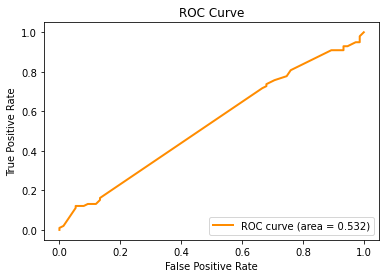

In [39]:
plot_roc(fpr, tpr, auc)

In [40]:
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    dist = (fpr**2+(1-tpr)**2)**0.5
    return pd.DataFrame({'threshold':[thresh],'tpr':[tpr],'fpr':[fpr],'distance':[dist]})

In [41]:
close1 = 1
for thresh in np.arange(0,1,.01):
    if tpr_fpr_thresh(phone_test['high_rating'], pred_prob, thresh)['distance'][0]<close1 :
        closecase1 = tpr_fpr_thresh(phone_test['high_rating'], pred_prob, thresh)
        close1 = tpr_fpr_thresh(phone_test['high_rating'], pred_prob, thresh)['distance'][0]
print(closecase1)

   threshold       tpr   fpr  distance
0       0.52  0.727273  0.68  0.732653


##### It was found that the best predictive probability threshold is $0.52$ as the distance between the ideal point(false positive rate : 0,true positive rate : 1) and the point on the ROC curve corresponding to the threshold $0.52$ is the smallest. To achieve our goal of checking for linearity, it is important to fit the best model that accurately represents the relationship between the response and explanatory variables. By minimizing the distance and finding the best balancing point for sensitivity and specificity, we can develop the best classifier.

Applying this threshold, the false positive rate is $0.68$ and the true positive rate is $0.727273$.

Our logistic regression analysis helps answer our research question by identifying which explanatory variables have an impact on the response variable and to what extent. Additionally, it allows us to determine the degree to which we can explain the response variable using the explanatory variables.

## 6. Conclusion

**Summarization**

First, we researched the relationship between price and frequency or size of a ram. We found out that there is a positive, but non-linear, moderate in strength relationship between frequency and price. A correlation value between two variables was 0.72. When we further looked the relationship of these variables depending on whether an extra memory card is supported or not, a presence of memory card was not a decisive feature to affect the relationship. Meanwhile, the relationship between price and size of a ram was not noticeable. 
Second research question was testing whether the population mean price of iOS brand would be greater than that of Android. The conclusion of this hypothesis testing was, to a 96% confidence level, we do have sufficient evidence to suggest that the population mean price of iOS is greater than the population mean price of Android. 
The third research question was conducted to explore the presence of linear relationship between price and ram, core, number of sim, whether the phone can put on extra memory card or not. Our model has a pretty low R-squared, so our model does not have enough significance to predict price with these explanatory variables. Nevertheless, we could find a kind of tendency between explanatory variables and the price. Our final research question is, "Is there a linear relationshop between the log-odds of the level of *rating* and *specs score*, *core*, *battery*, and *os brand* in the sample?". After iterations of backwards elimination, there was only one explanatory variable left. There was no slope that shows sufficient evidence to be non-zero as the battery, the only explanatory variable we have, has larger p-value than 0.05(our significant level).


**Future Work**

In the conclusion of the analysis, it was found that the sim variable had no significant impact on the price of the product in the given dataset. However, the model used to make this conclusion was a linear regression model. There are other types of models that can be used for this type of analysis, such as decision trees or random forests. These models can capture nonlinear relationships between the variables, which the linear regression model might have missed. Therefore, trying out different types of models can be a valuable approach to increase the accuracy of price prediction.

Additionally, the dataset used in the analysis may not be large enough to capture the full variability of the relationship between the variables and the price. Collecting more data and retraining the model on a larger dataset could improve the accuracy of price prediction. This approach would help to ensure that the model has enough information to capture the full range of variation in the data, and thus, would be more effective in predicting prices accurately.

In summary, using different types of models and collecting more data are two potential avenues for improving the accuracy of price prediction. By applying these approaches, we can gain a better understanding of the underlying relationships between the variables and the price, and ultimately, develop a more accurate model for predicting prices.